In [110]:
# importera en dataset från sklearn
# vi väljer att importera breast cancer dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [111]:
# ladda in datasetet
cancer = load_breast_cancer()

# skriva en sammanfattning av datasetet
print(
    f"Databasen innehåller information om bröstcancer.\n\n"
        f"Database filename är {cancer['filename']}\n"
        f"Vi importerar databasen från den {cancer['data_module']} module\n\n"
    f"Database summary:\n"
        f"Number of samples: {cancer['data'].shape[0]}\n"
        f"Number of features: {cancer['data'].shape[1]}\n"
        f"Number of classes: {cancer['target_names'].shape[0]}\n"
        f"Number of missing values: {np.isnan(cancer['data']).sum()}\n"
        f"Number of unique values: {np.unique(cancer['data']).shape[0]}\n"
        f"Number of features with missing values: {np.isnan(cancer['data']).any().sum()}\n"
        f"Number of features with constant values: {np.unique(cancer['data'], axis=0).shape[0]}\n"
        f"Number of features with duplicated values: {cancer['data'].shape[1] - np.unique(cancer['data'], axis=1).shape[1]}\n"
        f"Number of features with zero values: {np.count_nonzero(cancer['data'] == 0)}\n"
)

# nu printar vi en lite deskription av datasetet
print()
print(cancer['DESCR'])

# skapa en dataframe
df_cancer = pd.DataFrame(
                    np.c_[cancer['data'], cancer['target_names'][cancer['target']]], 
                    columns = np.append(cancer['feature_names'], ['target'])
            )

Databasen innehåller information om bröstcancer.

Database filename är breast_cancer.csv
Vi importerar databasen från den sklearn.datasets.data module

Database summary:
Number of samples: 569
Number of features: 30
Number of classes: 2
Number of missing values: 0
Number of unique values: 11998
Number of features with missing values: 0
Number of features with constant values: 569
Number of features with duplicated values: 0
Number of features with zero values: 78


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compact

In [112]:
# skriv ut de första 5 raderna
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,malignant
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902,malignant
2,19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744,...,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173,malignant
4,20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,...,16.67,152.2,1575.0,0.1374,0.205,0.4,0.1625,0.2364,0.07678,malignant


In [113]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   mean radius              569 non-null    object
 1   mean texture             569 non-null    object
 2   mean perimeter           569 non-null    object
 3   mean area                569 non-null    object
 4   mean smoothness          569 non-null    object
 5   mean compactness         569 non-null    object
 6   mean concavity           569 non-null    object
 7   mean concave points      569 non-null    object
 8   mean symmetry            569 non-null    object
 9   mean fractal dimension   569 non-null    object
 10  radius error             569 non-null    object
 11  texture error            569 non-null    object
 12  perimeter error          569 non-null    object
 13  area error               569 non-null    object
 14  smoothness error         569 non-null    o

In [114]:
df_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569,569,569,569,569,569,569,569,569,569,...,569,569,569,569,569,569,569,569,569,569
unique,456,479,522,539,474,537,537,542,432,499,...,511,514,544,411,529,539,492,500,535,2
top,12.34,20.52,82.61,512.2,0.1007,0.1147,0.0,0.0,0.1714,0.06113,...,27.26,117.7,472.4,0.1347,0.3416,0.0,0.0,0.2226,0.07427,benign
freq,4,3,3,3,5,3,13,13,4,3,...,3,3,2,4,3,13,13,3,3,357


In [115]:
df_cancer.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [116]:
# normalisera data i datasetet
# importera preprocessing från sklearn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_cancer_scaled = pd.DataFrame(scaler.fit_transform(df_cancer.drop(['target'], axis = 1)), columns=df_cancer.columns[:-1])

df_cancer = pd.concat([df_cancer_scaled, df_cancer['target']], axis = 1)

In [117]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,malignant
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,malignant
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,malignant
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,malignant
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,malignant


In [118]:
# konvertera till culumner till float
culumn = list(df_cancer.columns)[:-1]
print(culumn)


['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


In [119]:
# konvertera till float med pandas to_numeric
df_cancer[culumn] = df_cancer[culumn].apply(pd.to_numeric, errors='coerce')

In [120]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [121]:
corr = df_cancer.corr()

result = []
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.85 and abs(corr.iloc[i, j]) < 1:
            name_i = corr.columns[i]
            name_j = corr.columns[j]
            #print(name_i, '/', name_j)
            #print(corr.iloc[i, j])
            #print()
            result.append([name_i, name_j, corr.iloc[i, j]])

sorted_corr = sorted(result, key=lambda x: x[2], reverse=True)
print(sorted_corr[:5])

[['mean perimeter', 'mean radius', 0.9978552814938094], ['worst perimeter', 'worst radius', 0.9937079161029493], ['mean area', 'mean radius', 0.9873571700566123], ['mean area', 'mean perimeter', 0.9865068039913902], ['worst area', 'worst radius', 0.9840145644590723]]


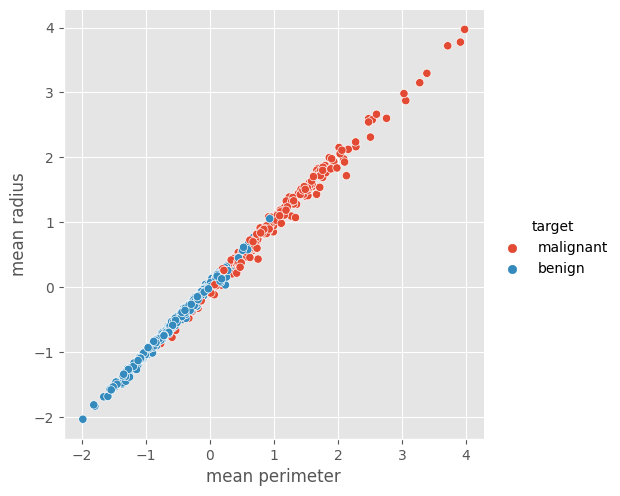

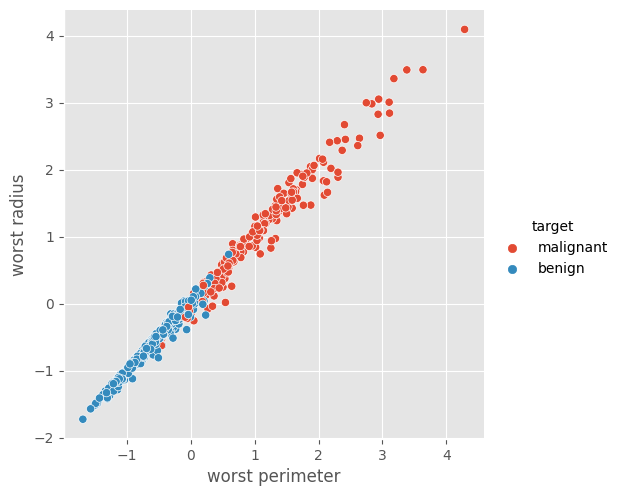

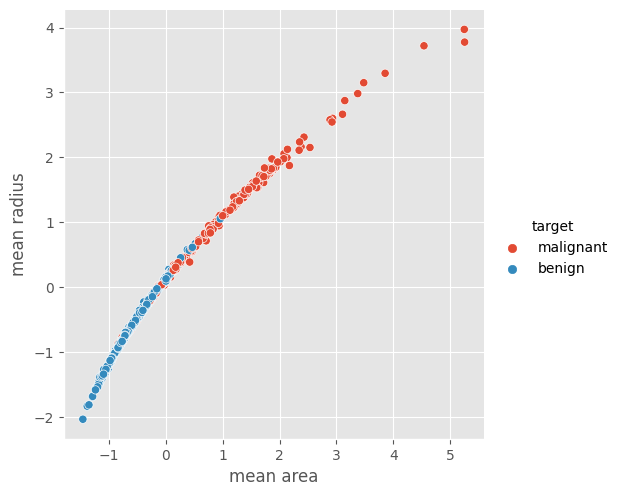

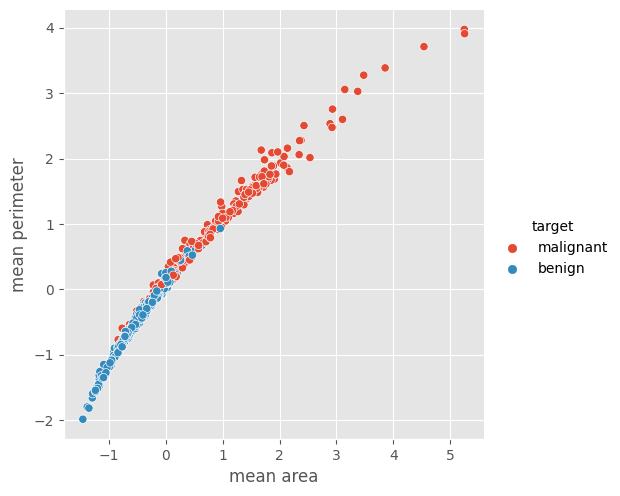

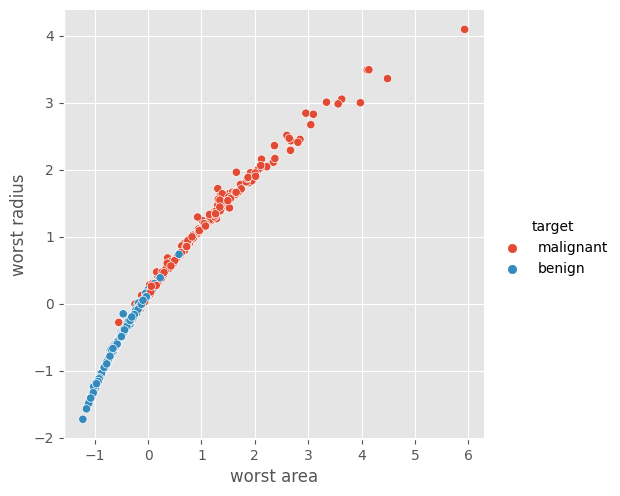

['mean area' 'mean perimeter' 'mean radius' 'worst area' 'worst perimeter'
 'worst radius']


In [122]:
from matplotlib import rcParams
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)

# köra en korrelation mellan alla kolumner i datasetet
for i in range(len(sorted_corr[:5])):
    sns.pairplot(df_cancer, x_vars=sorted_corr[i][0], y_vars=sorted_corr[i][1], hue="target", height=5)
    plt.show()

# skapa en lista av kolumner son vill använda för att träna modellen
temp = np.array([])
for i in range(len(sorted_corr[:5])):
    temp = np.append(temp, sorted_corr[i][1])
    temp = np.append(temp, sorted_corr[i][0])

# ta bort dubletter
temp = np.unique(temp)
print(temp)



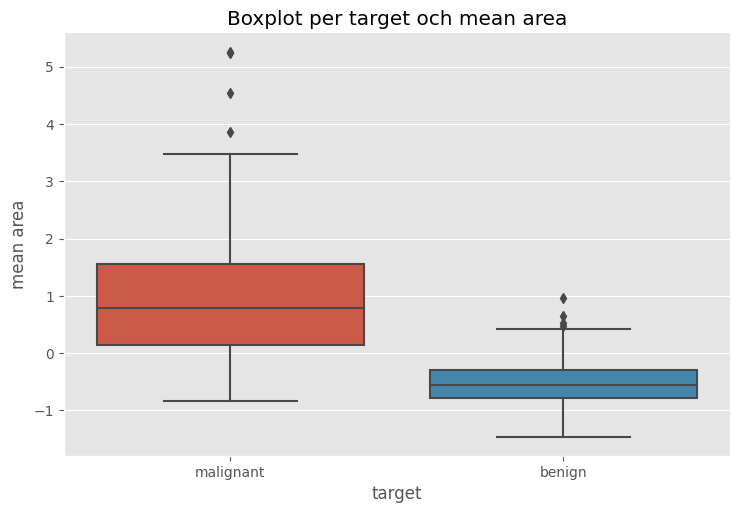

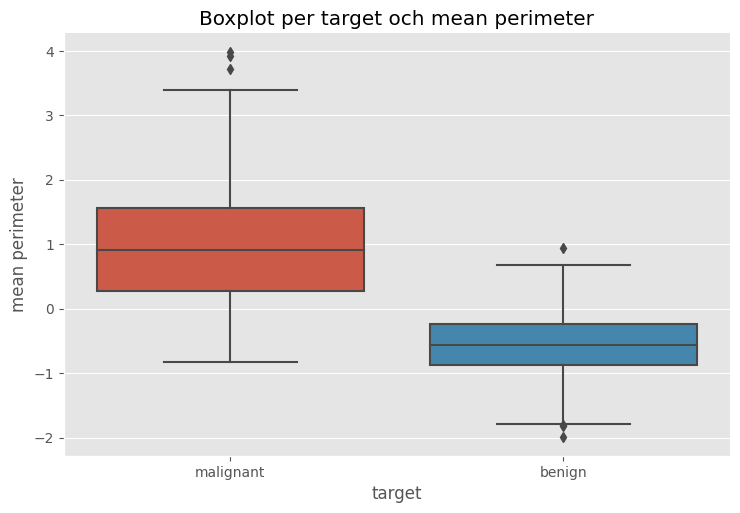

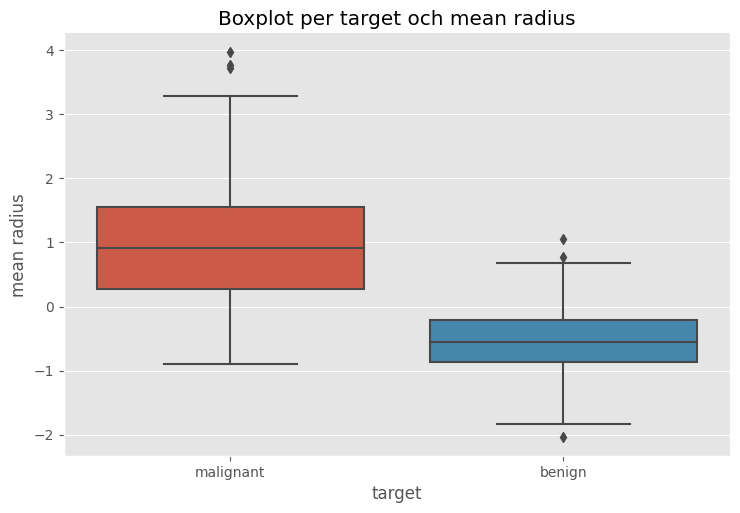

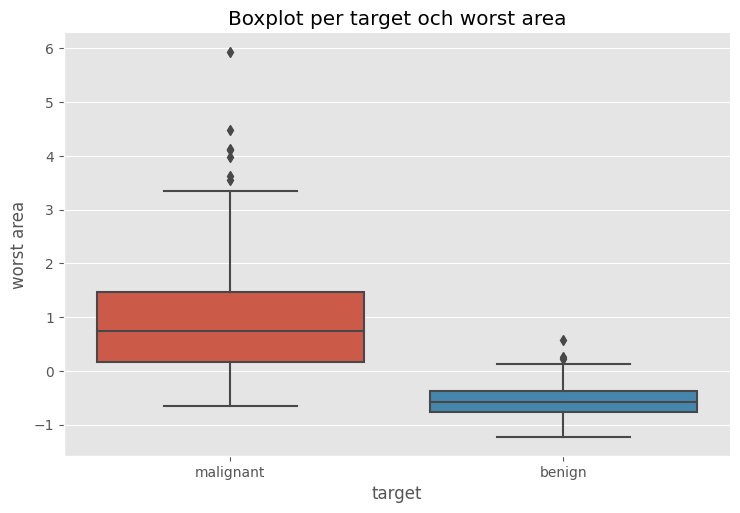

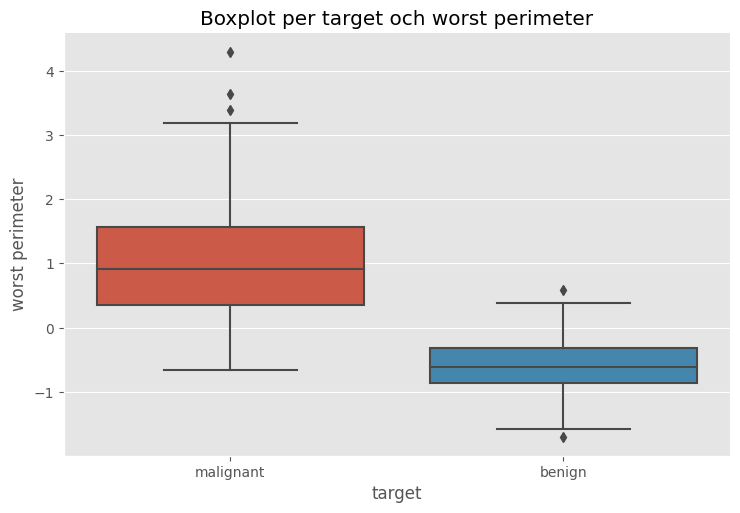

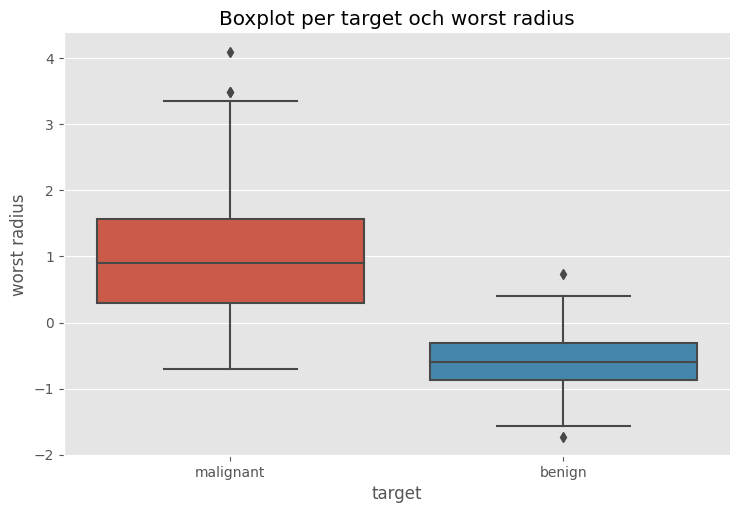

In [123]:
# skapa en boxplot för varje kolumn i temp för att se om det finns några outliers
for i in temp:
    sns.catplot(x="target", y=i, data=df_cancer, kind="box", aspect=1.5)
    plt.title(f"Boxplot per target och {i}")
    plt.show()


ML

In [124]:
cancer = load_breast_cancer()
df_cancer = pd.DataFrame(
                    np.c_[cancer['data'], cancer['target']], 
                    columns = np.append(cancer['feature_names'], ['target'])
            )
scaler = StandardScaler()
df_cancer_scaled = pd.DataFrame(scaler.fit_transform(df_cancer.drop(['target'], axis = 1)), columns=df_cancer.columns[:-1])

df_cancer = pd.concat([df_cancer_scaled, df_cancer['target']], axis = 1)


In [125]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0.0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0.0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0.0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0.0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0.0


In [126]:
# träna en modell
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X = df_cancer[temp]
y = df_cancer['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

# printa ut resultatet
print("Coefficients: \n", lin_reg.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))



Coefficients: 
 [-0.67967241 -1.68053492  2.62740155  1.15563519  0.20307434 -1.98105986]
Mean squared error: 0.07
Mean absolute error: 0.20
Coefficient of determination: 0.72


In [127]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, X, y, cv = 5)
print("Accuratezza della cross validation: ", scores)
print("Accuratezza media della cross validation: ", scores.mean())

Accuratezza della cross validation:  [0.5644816  0.66702921 0.77079051 0.68234159 0.61074826]
Accuratezza media della cross validation:  0.6590782370360712


In [133]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {"alpha": [ 0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("\n")
print("GRIDSEARCH")
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))
print("Test set score: {:.2f}".format(grid_search.best_score_))

random_search = RandomizedSearchCV(Ridge(), param_grid, n_iter=5, cv=5)
random_search.fit(X_train, y_train)

print("\n")
print("RANDOMSEARCH")
print("Best parameters: {}".format(random_search.best_params_))
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))
print("Best estimator:\n{}".format(random_search.best_estimator_))
print("Test set score: {:.2f}".format(random_search.best_score_))






GRIDSEARCH
Best parameters: {'alpha': 0.01}
Best cross-validation score: 0.67
Best estimator:
Ridge(alpha=0.01)
Test set score: 0.67


RANDOMSEARCH
Best parameters: {'alpha': 0.01}
Best cross-validation score: 0.67
Best estimator:
Ridge(alpha=0.01)
Test set score: 0.67


In [129]:
ridge_model = Ridge(alpha=grid_search.best_params_['alpha'])
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

# printa ut resultatet
print("Coefficients: \n", ridge_model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Coefficient of determination: %.2f" % r2)
rm = ridge_model.score(X_test, y_test)
diff = r2 - rm
print("Difference: %.2f" % diff)



Coefficients: 
 [-0.65923902 -1.6164186   2.54244345  1.13496569  0.16925134 -1.92668483]
Mean squared error: 0.07
Mean absolute error: 0.20
Coefficient of determination: 0.72
Difference: 0.00


In [135]:
param_grid = {"alpha": [ 0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(Lasso(), param_grid, cv=10)
grid_search.fit(X_train, y_train)

print("\n")
print("GRIDSEARCH")
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))
print("Test set score: {:.2f}".format(grid_search.best_score_))

random_search = RandomizedSearchCV(Lasso(), param_grid, n_iter=10, cv=10)
random_search.fit(X_train, y_train)

print("\n")
print("RANDOMSEARCH")
print("Best parameters: {}".format(random_search.best_params_))
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))
print("Best estimator:\n{}".format(random_search.best_estimator_))
print("Test set score: {:.2f}".format(random_search.best_score_))


/home/onizuka-host/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.004e+00, tolerance: 8.457e-03
  model = cd_fast.enet_coordinate_descent(
/home/onizuka-host/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.192e+00, tolerance: 8.434e-03
  model = cd_fast.enet_coordinate_descent(
/home/onizuka-host/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati



GRIDSEARCH
Best parameters: {'alpha': 0.001}
Best cross-validation score: 0.65
Best estimator:
Lasso(alpha=0.001)
Test set score: 0.65


RANDOMSEARCH
Best parameters: {'alpha': 0.001}
Best cross-validation score: 0.65
Best estimator:
Lasso(alpha=0.001)
Test set score: 0.65


/home/onizuka-host/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.278e+00, tolerance: 9.322e-03
  model = cd_fast.enet_coordinate_descent(


In [136]:
lasso_model = Lasso(alpha=grid_search.best_params_['alpha'])
lasso_model.fit(X_train, y_train)

y_pred = lasso_model.predict(X_test)

# printa ut resultatet
print("Coefficients: \n", lasso_model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Coefficient of determination: %.2f" % r2)
rm = lasso_model.score(X_test, y_test)
diff = r2 - rm
print("Difference: %.2f" % diff)


Coefficients: 
 [-0.14106518 -0.40069742  0.79061928  0.62088768 -0.41763331 -0.81894853]
Mean squared error: 0.07
Mean absolute error: 0.21
Coefficient of determination: 0.71
Difference: 0.00


/home/onizuka-host/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.278e+00, tolerance: 9.322e-03
  model = cd_fast.enet_coordinate_descent(
